In [1]:
from TSPGraph import Graph
import numpy as np
import copy
from functools import lru_cache

In [2]:
graphs = [Graph('A'),Graph('B'),Graph('C'),Graph('D')]

In [3]:
def random_solution():
    sol = np.random.choice(np.arange(200),size=100,replace=False)
    return np.append(sol,sol[0])

In [4]:
for graph in graphs:    
    costs_rs = []
    cycles_rs = []
    for i in range(200):
        a = random_solution()
        costs_rs.append(graph.cycle_cost(a))
        cycles_rs.append(a)
    print(np.min(costs_rs), np.max(costs_rs), np.mean(costs_rs))

239895 287456 266036.4
242844 288471 266937.98
193047 237554 215121.565
193499 241096 218138.405


In [5]:
def add_nn(graph, cycle):
    candidates = np.delete(np.arange(200), cycle)
    all_possible_neighbours = tuple(np.array(np.meshgrid(cycle[-1], candidates)).reshape(2, -1))
    best_neighbour = np.argmin(graph.objective[all_possible_neighbours])
    return np.append(cycle, all_possible_neighbours[1][best_neighbour])
add_nn(graphs[0], [0,1,2])

array([0, 1, 2, 4])

In [6]:
def generate_nn_solution(starting_point=0, log=False):
    a=np.array([starting_point])
    history = []
    if log:
        history.append(a.tolist())
    while(len(a)<100):
        a = add_nn(graph, a)
        if log:
            history.append(a.tolist())
    a = np.append(a,a[0])
    if log:
        history.append(a.tolist())
    return a, history

In [7]:
for graph in graphs:    
    costs_nn = []
    cycles_nn = []
    for i in range(200):
        a,_ = generate_nn_solution(i)
        costs_nn.append(graph.cycle_cost(a))
        cycles_nn.append(a)
    print(np.min(costs_nn), np.max(costs_nn), np.mean(costs_nn))

84471 95013 87679.135
77448 82631 79282.58
56304 63697 58872.68
50335 59846 54290.68


In [8]:
@lru_cache(maxsize=1_000_000)
def addition_cost(graph, triplet):
    return graph.objective[triplet[0], triplet[1]] + graph.objective[triplet[1], triplet[2]] - graph.objective[triplet[0], triplet[2]]

In [9]:
def add_greedy(graph, cycle):
    candidates = np.delete(np.arange(200), cycle)
    best_candidate = -1
    min_cost = 99999999
    for i in range(len(cycle)-1):
        for candidate in candidates:
            cost = addition_cost(graph,(cycle[i],candidate,cycle[i+1]))
            if cost<min_cost:
                min_cost = cost
                insert_id = i+1
                best_candidate = candidate
    return np.concatenate((cycle[:insert_id],np.array([best_candidate]).reshape((1,)), cycle[insert_id:]))
add_greedy(graph, np.array([0,1,0]))

array([  0, 143,   1,   0])

In [10]:
for graph in graphs:    
    costs_gc = []
    cycles_gc = []
    for i in range(200):
        a=np.array([i])
        a = add_nn(graph, a)
        a = np.append(a,a[0])
        while(len(a)<101):
            a = add_greedy(graph, a)
        costs_gc.append(graph.cycle_cost(a))
        cycles_gc.append(a) 
    print(np.min(costs_gc), np.max(costs_gc), np.mean(costs_gc))

75666 80321 77076.88
68743 76324 70727.43
53226 58876 55839.8
50409 60964 54832.245


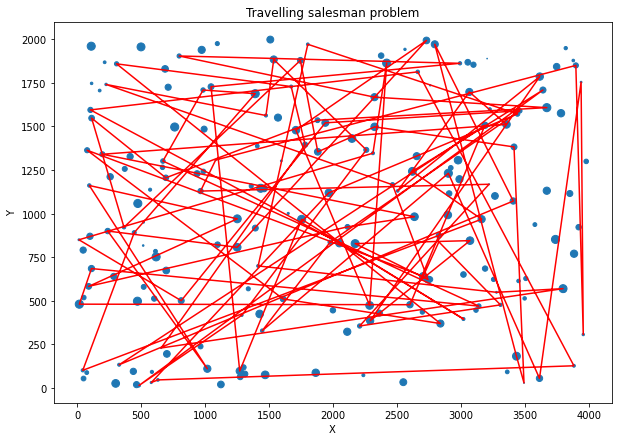

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [11]:
graph.plot(cycle=cycles_rs[np.argmin(costs_rs)])

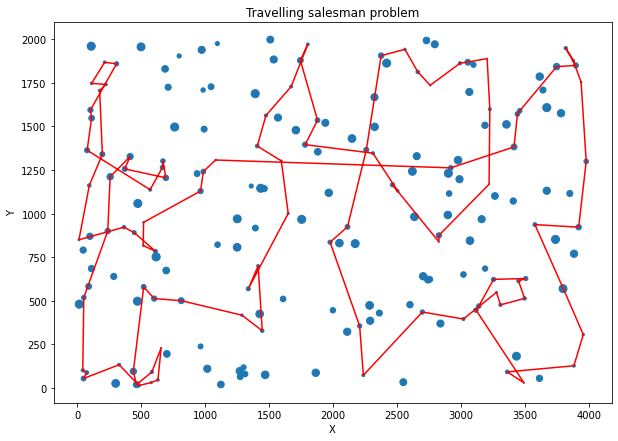

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [12]:
graph.plot(cycle=cycles_nn[np.argmin(costs_nn)])

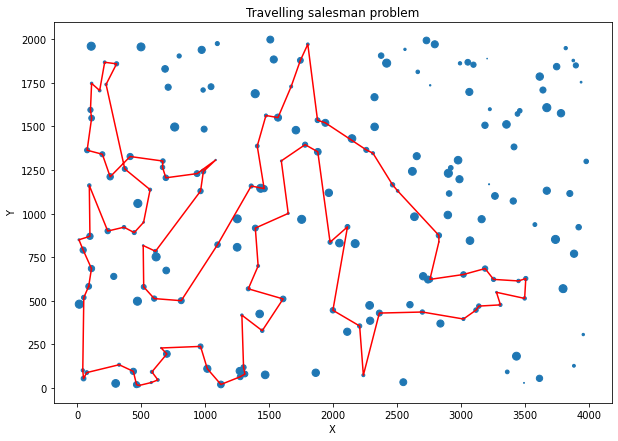

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [13]:
graph.plot(cycle=cycles_gc[np.argmin(costs_gc)])

In [14]:
%matplotlib notebook
a, cycles = generate_nn_solution(np.argmin(costs_nn), True)
graph.anim_plot([cycles])

<IPython.core.display.Javascript object>

c:\Users\Kuba\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: setting an array element with a sequence.